In [1]:
!gdown 1pPLV4BTckGewwnh-08TREd14k9ViGIjh

Downloading...
From: https://drive.google.com/uc?id=1pPLV4BTckGewwnh-08TREd14k9ViGIjh
To: /content/10lakh.csv
100% 10.5M/10.5M [00:00<00:00, 103MB/s] 


In [2]:
import pandas as pd
df=pd.read_csv('10lakh.csv')

In [3]:
df.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No
1,9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No
2,536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No
3,13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No
4,17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No


In [7]:
#no of instances and features
df.shape

(100000, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100000 non-null  int64  
 1   User            100000 non-null  int64  
 2   Card            100000 non-null  int64  
 3   Year            100000 non-null  int64  
 4   Month           100000 non-null  int64  
 5   Day             100000 non-null  int64  
 6   Time            100000 non-null  object 
 7   Amount          100000 non-null  object 
 8   Use Chip        100000 non-null  object 
 9   Merchant Name   100000 non-null  int64  
 10  Merchant City   100000 non-null  object 
 11  Merchant State  88782 non-null   object 
 12  Zip             88134 non-null   float64
 13  MCC             100000 non-null  int64  
 14  Errors?         1576 non-null    object 
 15  Is Fraud?       100000 non-null  object 
dtypes: float64(1), int64(8), object(7)
memory usage: 12.2+ MB

In [9]:
# Count: the number of non-null values in the column.
# Mean: the average of all values in the column.
# Standard Deviation: a measure of how spread out the values in the column are.
# Minimum: the smallest value in the column.
# 25th percentile: the value below which 25% of the data falls in the column.
# 50th percentile (Median): the value below which 50% of the data falls in the column.
# 75th percentile: the value below which 75% of the data falls in the column.
# Maximum: the largest value in the column.
print(df.describe())

         Unnamed: 0           User           Card           Year  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.217696e+07     999.621310       1.349500    2011.949130   
std    7.053726e+06     570.576191       1.405393       5.095565   
min    5.270000e+02       0.000000       0.000000    1991.000000   
25%    6.057767e+06     508.000000       0.000000    2008.000000   
50%    1.217582e+07    1006.000000       1.000000    2013.000000   
75%    1.828532e+07    1476.000000       2.000000    2016.000000   
max    2.438683e+07    1999.000000       8.000000    2020.000000   

               Month            Day  Merchant Name           Zip  \
count  100000.000000  100000.000000   1.000000e+05  88134.000000   
mean        6.537190      15.752020  -5.083179e+17  51115.434849   
std         3.479503       8.795765   4.748223e+18  29350.045054   
min         1.000000       1.000000  -9.219257e+18   1020.000000   
25%         3.000000       8.000000  -4.530601e

Use Chip
Swipe Transaction     63128
Chip Transaction      25685
Online Transaction    11187
Name: Use Chip, dtype: int64


<Axes: title={'center': 'Type of transaction'}, ylabel='Use Chip'>

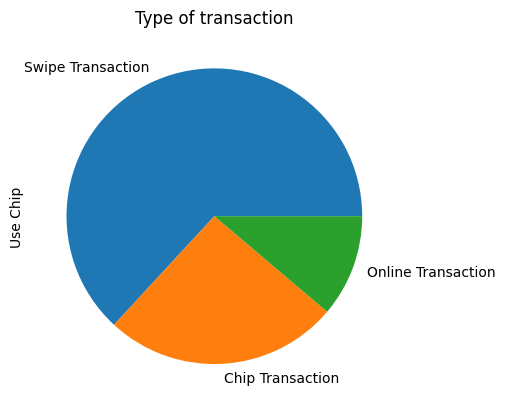

In [10]:
#UseChips
Type_ofChip = df.groupby('Use Chip')['Use Chip'].count().sort_values(ascending=False)
print(Type_ofChip)

Type_ofChip.head(10).plot(kind='pie', title='Type of transaction')

Amount
$80.00     1033
$100.00    1032
$60.00      810
$120.00     662
$40.00      439
           ... 
$200.82       1
$200.89       1
$200.90       1
$200.91       1
$996.15       1
Name: Amount, Length: 16818, dtype: int64


<Axes: title={'center': 'Range of money'}, xlabel='in dollars', ylabel='range'>

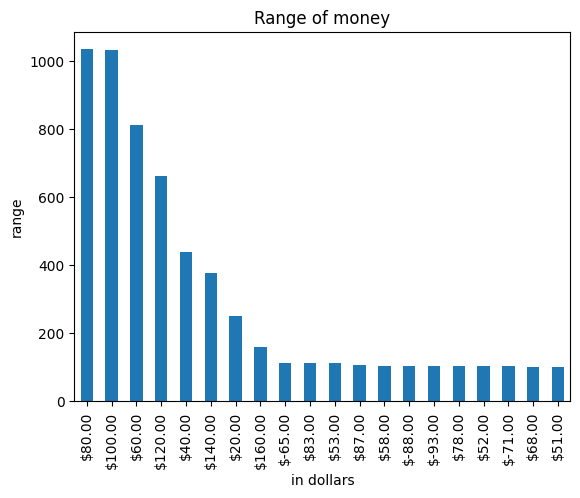

In [12]:
#Range of Money
AmountMoney = df.groupby('Amount')['Amount'].count().sort_values(ascending=False)
print(AmountMoney)

AmountMoney.head(20).plot(kind='bar', title='Range of money', ylabel='range',
         xlabel='in dollars')

In [18]:
df['Is Fraud?'].nunique()


2

In [19]:
df['Is Fraud?'].value_counts()

No     99883
Yes      117
Name: Is Fraud?, dtype: int64

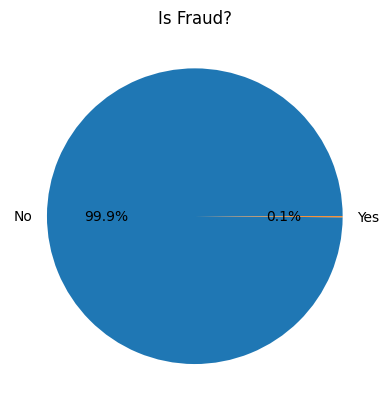

In [27]:
#isFraud
import matplotlib.pyplot as plt
# group by the 'Is Fraud?' column and count the number of each unique value
fraud_count = df.groupby('Is Fraud?')['Is Fraud?'].count()

# create a pie chart of the fraud data
fraud_count.plot.pie(title='Is Fraud?', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [14]:
TypeChip_isFraud=[]
# iterate over the rows of the dataframe
for index, row in df.iterrows():
    
    TypeChip = row['Use Chip']
    isFraud = row['Is Fraud?']
    
    # apply if-else conditions
    if isFraud == 'Yes':
      TypeChip_isFraud.append(TypeChip)
    else:
      TypeChip_isFraud.append('NA')
TypeChip_isFraud        

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',

In [30]:
df['Fraud_Transaction']=TypeChip_isFraud


In [31]:
df.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Fraud_Transaction
0,18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No,NA
1,9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No,NA
2,536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No,NA
3,13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No,NA
4,17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No,NA


In [32]:
df['Fraud_Transaction'].value_counts()

NA                    99883
Online Transaction       79
Swipe Transaction        25
Chip Transaction         13
Name: Fraud_Transaction, dtype: int64

Fraud_Transaction
NA                    99883
Online Transaction       79
Swipe Transaction        25
Chip Transaction         13
Name: Fraud_Transaction, dtype: int64


<Axes: title={'center': 'Fraud_Transaction'}, xlabel='type of transaction', ylabel='range'>

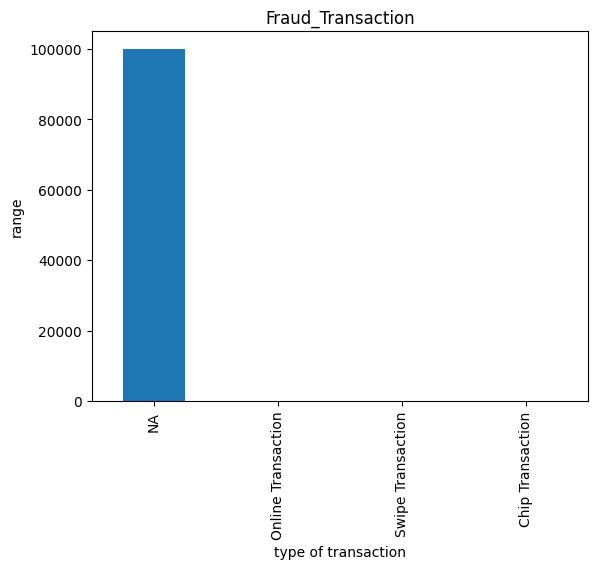

In [40]:
#Fraud_Transaction
#Range of MoneyTYpeofTrans
FraudTran = df.groupby('Fraud_Transaction')['Fraud_Transaction'].count().sort_values(ascending=False)
print(FraudTran)

FraudTran.head().plot(kind='bar', title='Fraud_Transaction', ylabel='range',
         xlabel='type of transaction')

In [41]:
Amount_isFraud=[]
# iterate over the rows of the dataframe
for index, row in df.iterrows():
    
    Amount = row['Amount']
    isFraud = row['Is Fraud?']
    
    # apply if-else conditions
    if isFraud == 'Yes':
      Amount_isFraud.append(Amount)
    else:
     Amount_isFraud.append('NA')
Amount_isFraud     

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',

In [42]:
df['Amount_isFraud']=Amount_isFraud

In [44]:
df['Amount_isFraud'].value_counts()

NA         99883
$166.83        1
$59.06         1
$162.84        1
$13.88         1
           ...  
$27.49         1
$220.86        1
$175.11        1
$31.82         1
$291.00        1
Name: Amount_isFraud, Length: 118, dtype: int64

Amount_isFraud
NA         99883
$42.85         1
$57.46         1
$55.23         1
$53.58         1
           ...  
$236.70        1
$226.62        1
$223.00        1
$220.86        1
$213.81        1
Name: Amount_isFraud, Length: 100, dtype: int64


<Axes: title={'center': 'Amount_isFraud'}, xlabel='Money', ylabel='range'>

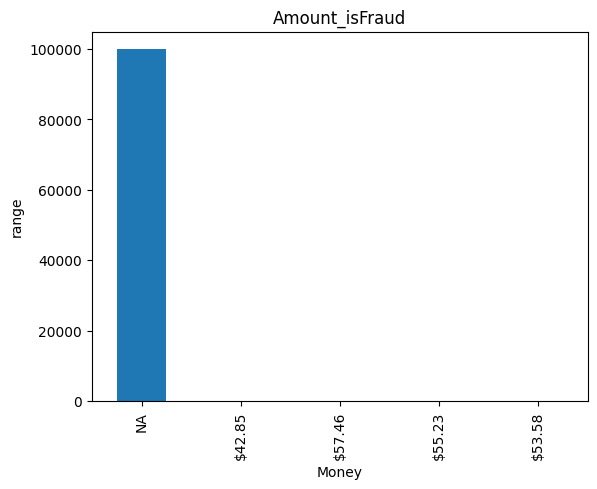

In [49]:
amtFraud = df.groupby('Amount_isFraud')['Amount_isFraud'].count().sort_values(ascending=False)
print(amtFraud.head(100))

amtFraud.head().plot(kind='bar', title='Amount_isFraud', ylabel='range',
         xlabel='Money')

In [47]:
print(df['Amount_isFraud'].nunique())
print(df['Amount_isFraud'].shape[0])

118
100000


In [50]:
#Merchant Name
df['Merchant Name'].value_counts()

-4282466774399734331    4697
 1799189980464955940    4578
 2027553650310142703    4150
-2088492411650162548    2979
-1288082279022882052    2918
                        ... 
-2272046454155871148       1
 7145908749657917118       1
-6923997151719137860       1
 8136164975916849506       1
 5450408764587163457       1
Name: Merchant Name, Length: 11396, dtype: int64

Merchant Name
-4282466774399734331    4697
 1799189980464955940    4578
 2027553650310142703    4150
-2088492411650162548    2979
-1288082279022882052    2918
                        ... 
-1454566384742351039       1
-1455526409200397279       1
-1457531505935763082       1
-1457647123916123560       1
-125406840590396835        1
Name: Merchant Name, Length: 11396, dtype: int64


<Axes: title={'center': 'MerchantNAmeFraud'}, ylabel='Merchant Name'>

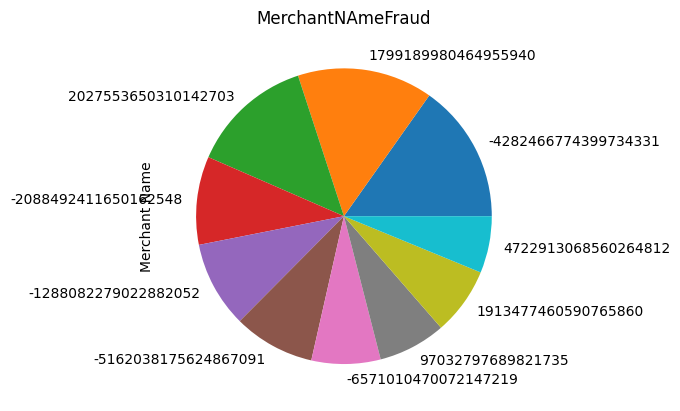

In [54]:
#Merchant Name
import matplotlib.pyplot as plt

MerchantNAmeFraud = df.groupby('Merchant Name')['Merchant Name'].count().sort_values(ascending=False)
print(MerchantNAmeFraud)

MerchantNAmeFraud.head(10).plot(kind='pie', title='MerchantNAmeFraud')

In [55]:
import seaborn as sns

<ipython-input-56-cf4718bc8b6a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


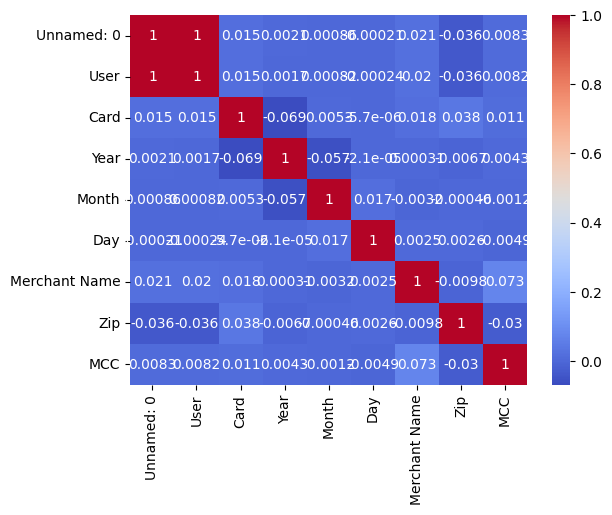

In [56]:
#HeatMap-Correlation
# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()

In [58]:
df.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Fraud_Transaction,Amount_isFraud
0,18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No,NA,NA
1,9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No,NA,NA
2,536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No,NA,NA
3,13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No,NA,NA
4,17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No,NA,NA


,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Fraud_Transaction,Amount_isFraud
0,18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No,NA,NA
1,9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No,NA,NA
2,536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No,NA,NA
3,13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No,NA,NA
4,17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No,NA,NA


In [59]:
#combing merchant column
df['Combined_merchantAddr'] = df['Merchant Name'].astype(str) + '-' + df['Merchant City'].astype(str) + '-' + df['Merchant State'].astype(str) + '-' + df['Zip'].astype(str)

In [60]:
df['Combined_merchantAddr'].value_counts()

-2088492411650162548-ONLINE-nan-nan             2979
-5841929396161652653-ONLINE-nan-nan             1179
-6160036380778658394-ONLINE-nan-nan             1161
4241336128694185533-ONLINE-nan-nan               666
-6458444334611773637-ONLINE-nan-nan              648
                                                ... 
-6035332392926029059-Pittsburgh-PA-15212.0         1
-8118340269267210522-Marietta-GA-30067.0           1
8211060416101049848-Lisbon-IA-52253.0              1
-9146515452629552004-Monroe-MI-48161.0             1
-85070450838390220-Pleasant Grove-AL-35127.0       1
Name: Combined_merchantAddr, Length: 31559, dtype: int64

In [61]:
#combing merchant column without merchant name
df['Combined_merchantwithoutname'] =  df['Merchant City'].astype(str) + '-' + df['Merchant State'].astype(str) + '-' + df['Zip'].astype(str)

In [62]:
df['Combined_merchantwithoutname'].value_counts()

ONLINE-nan-nan               11218
Olympia-WA-98516.0             242
Nashport-OH-43830.0            215
Oakland-CA-94606.0             186
Watsonville-CA-95076.0         183
                             ...  
Coeburn-VA-24230.0               1
Murfreesboro-TN-37130.0          1
Henryetta-OK-74437.0             1
Plainfield-IL-60544.0            1
Pleasant Grove-AL-35127.0        1
Name: Combined_merchantwithoutname, Length: 9585, dtype: int64

In [63]:
df['MCC'].value_counts()

5411    11800
5499    10987
5541    10658
5812     7325
5912     5692
        ...  
3008        3
3005        2
3144        2
5722        1
4411        1
Name: MCC, Length: 109, dtype: int64